# EDB: Layout Components

This example shows how you can use EDB to create a parametric component using
3D Layout and use it in HFSS 3D.

## Perform required imports

Perform required imports.

In [1]:
import os
import tempfile

import ansys.aedt.core
import pyedb

## Set non-graphical mode

In [2]:
non_graphical = False

## Create data classes

Data classes are useful to do calculations and store variables.
There are three data classes: ``Patch``, ``Line``, and ``Array``.

In [3]:
class Patch:
    def __init__(self, width=0.0, height=0.0, position=0.0):
        self.width = width
        self.height = height
        self.position = position

    @property
    def points(self):
        return [
            [self.position, "-{}/2".format(self.height)],
            ["{} + {}".format(self.position, self.width), "-{}/2".format(self.height)],
            ["{} + {}".format(self.position, self.width), "{}/2".format(self.height)],
            [self.position, "{}/2".format(self.height)],
        ]


class Line:
    def __init__(self, length=0.0, width=0.0, position=0.0):
        self.length = length
        self.width = width
        self.position = position

    @property
    def points(self):
        return [
            [self.position, "-{}/2".format(self.width)],
            ["{} + {}".format(self.position, self.length), "-{}/2".format(self.width)],
            ["{} + {}".format(self.position, self.length), "{}/2".format(self.width)],
            [self.position, "{}/2".format(self.width)],
        ]


class LinearArray:
    def __init__(self, nb_patch=1, array_length=10e-3, array_width=5e-3):
        self.nbpatch = nb_patch
        self.length = array_length
        self.width = array_width

    @property
    def points(self):
        return [
            [-1e-3, "-{}/2-1e-3".format(self.width)],
            ["{}+1e-3".format(self.length), "-{}/2-1e-3".format(self.width)],
            ["{}+1e-3".format(self.length), "{}/2+1e-3".format(self.width)],
            [-1e-3, "{}/2+1e-3".format(self.width)],
        ]

## Launch EDB

PyEDB.Edb allows to open existing Edb project or create a new empty project.

In [4]:
temp_dir = tempfile.TemporaryDirectory(suffix=".ansys")
aedb_path = os.path.join(temp_dir.name, "linear_array.aedb")

# Select EDB version (change it manually if needed, e.g. "2025.1")
edb_version = "2025.2"
print(f"EDB version: {edb_version}")

# Create an instance of the Edb class.
edb = pyedb.Edb(edbpath=aedb_path, edbversion=edb_version)

EDB version: 2025.2


C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\misc\decorators.py:55: UserWarning: Argument `edbversion` is deprecated for method `Edb`; use `version` instead.
  warnings.warn(
C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\generic\design_types.py:301: UserWarning: Your ANSYS AEDT version is eligible to gRPC version.You might consider switching to that version for better user experience.For more information please check this link: https://edb.docs.pyansys.com/version/dev/grpc_api/index.html
  warnings.warn(GRPC_GENERAL_WARNING, UserWarning)


PyEDB INFO: Star initializing Edb 04:42:37.996088


INFO:Edb:Star initializing Edb 04:42:37.996088


PyEDB INFO: Edb version 2025.2


INFO:Edb:Edb version 2025.2


PyEDB INFO: Logger is initialized. Log file is saved to C:\Users\ansys\AppData\Local\Temp\pyedb_ansys.log.


INFO:Edb:Logger is initialized. Log file is saved to C:\Users\ansys\AppData\Local\Temp\pyedb_ansys.log.


PyEDB INFO: legacy v0.61.0


INFO:Edb:legacy v0.61.0


PyEDB INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


INFO:Edb:Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyEDB INFO: create_edb completed in 8.6905 seconds.


INFO:Edb:create_edb completed in 8.6905 seconds.


PyEDB INFO: EDB C:\Users\ansys\AppData\Local\Temp\tmpb693ue8m.ansys\linear_array.aedb created correctly.


INFO:Edb:EDB C:\Users\ansys\AppData\Local\Temp\tmpb693ue8m.ansys\linear_array.aedb created correctly.


PyEDB INFO: EDB initialization completed in 8.7701 seconds.


INFO:Edb:EDB initialization completed in 8.7701 seconds.


In [5]:
# Add stackup layers
layers = {
    "materials": {"copper_high_cond": {"conductivity": 60000000}},
    "layers": {
        "TOP": {"type": "signal", "thicness": "35um", "material": "copper_high_cond"},
        "Substrat": {"type": "dielectric", "thicness": "0.5mm", "material": "Duroid (tm)"},
        "GND": {"type": "signal", "thicness": "35um", "material": "copper"},
        "Gap": {"type": "dielectric", "thicness": "0.05mm", "material": "Air"},
        "Virt_GND": {"type": "signal", "thicness": "35um", "material": "copper"},
    },
}

In [6]:
edb.stackup.load(layers)

INFO:pyedb.dotnet.database.stackup:Material FR4_epoxy found in syslib. Adding it to aedb project.


INFO:pyedb.dotnet.database.stackup:Material Duroid (tm) found in syslib. Adding it to aedb project.


INFO:pyedb.dotnet.database.stackup:Material copper found in syslib. Adding it to aedb project.


INFO:pyedb.dotnet.database.stackup:Material Air found in syslib. Adding it to aedb project.


True

Create the first patch and feed line using the ``Patch``, ``Line``classes defined above.

Define parameters:

In [7]:
edb["w1"] = 1.4e-3
edb["h1"] = 1.2e-3
edb["initial_position"] = 0.0
edb["l1"] = 2.4e-3
edb["trace_w"] = 0.3e-3

first_patch = Patch(width="w1", height="h1", position="initial_position")
edb.modeler.create_polygon(first_patch.points, "TOP", net_name="Array_antenna")

First line

In [8]:
first_line = Line(length="l1", width="trace_w", position=first_patch.width)
edb.modeler.create_polygon(first_line.points, "TOP", net_name="Array_antenna")

Now use the ``LinearArray`` class to create the array.

In [9]:
edb["w2"] = 2.29e-3
edb["h2"] = 3.3e-3
edb["l2"] = 1.9e-3
edb["trace_w2"] = 0.2e-3

patch = Patch(width="w2", height="h2")
line = Line(length="l2", width="trace_w2")
linear_array = LinearArray(nb_patch=8, array_width=patch.height)

current_patch = 1
current_position = "{} + {}".format(first_line.position, first_line.length)

while current_patch <= linear_array.nbpatch:
    patch.position = current_position
    edb.modeler.create_polygon(patch.points, "TOP", net_name="Array_antenna")
    current_position = "{} + {}".format(current_position, patch.width)
    if current_patch < linear_array.nbpatch:
        line.position = current_position
        edb.modeler.create_polygon(line.points, "TOP", net_name="Array_antenna")
        current_position = "{} + {}".format(current_position, line.length)
    current_patch += 1

linear_array.length = current_position

Add the ground conductor.

In [10]:
edb.modeler.create_polygon(linear_array.points, "GND", net_name="GND")

Add the connector pin to use to assign the port.

In [11]:
edb.padstacks.create(padstackname="Connector_pin", holediam="100um", paddiam="0", antipaddiam="200um")
con_pin = edb.padstacks.place(
    ["{}/4.0".format(first_patch.width), 0],
    "Connector_pin",
    net_name="Array_antenna",
    fromlayer="TOP",
    tolayer="GND",
    via_name="coax",
)

PyEDB INFO: Padstack Connector_pin create correctly


INFO:Edb:Padstack Connector_pin create correctly


Add a connector ground.

In [12]:
edb.modeler.create_polygon(first_patch.points, "Virt_GND", net_name="GND")
edb.padstacks.create("gnd_via", "100um", "0", "0")
edb["via_spacing"] = 0.2e-3
con_ref1 = edb.padstacks.place(
    [
        "{} + {}".format(first_patch.points[0][0], "via_spacing"),
        "{} + {}".format(first_patch.points[0][1], "via_spacing"),
    ],
    "gnd_via",
    fromlayer="GND",
    tolayer="Virt_GND",
    net_name="GND",
)
con_ref2 = edb.padstacks.place(
    [
        "{} + {}".format(first_patch.points[1][0], "-via_spacing"),
        "{} + {}".format(first_patch.points[1][1], "via_spacing"),
    ],
    "gnd_via",
    fromlayer="GND",
    tolayer="Virt_GND",
    net_name="GND",
)
con_ref3 = edb.padstacks.place(
    [
        "{} + {}".format(first_patch.points[2][0], "-via_spacing"),
        "{} + {}".format(first_patch.points[2][1], "-via_spacing"),
    ],
    "gnd_via",
    fromlayer="GND",
    tolayer="Virt_GND",
    net_name="GND",
)
con_ref4 = edb.padstacks.place(
    [
        "{} + {}".format(first_patch.points[3][0], "via_spacing"),
        "{} + {}".format(first_patch.points[3][1], "-via_spacing"),
    ],
    "gnd_via",
    fromlayer="GND",
    tolayer="Virt_GND",
    net_name="GND",
)

PyEDB INFO: Padstack gnd_via create correctly


INFO:Edb:Padstack gnd_via create correctly


Define the port.

In [13]:
edb.padstacks.set_solderball(con_pin, "Virt_GND", isTopPlaced=False, ballDiam=0.1e-3)
port_name = edb.padstacks.create_coax_port(con_pin)

Display the model using the ``Edb.nets.plot()`` method.

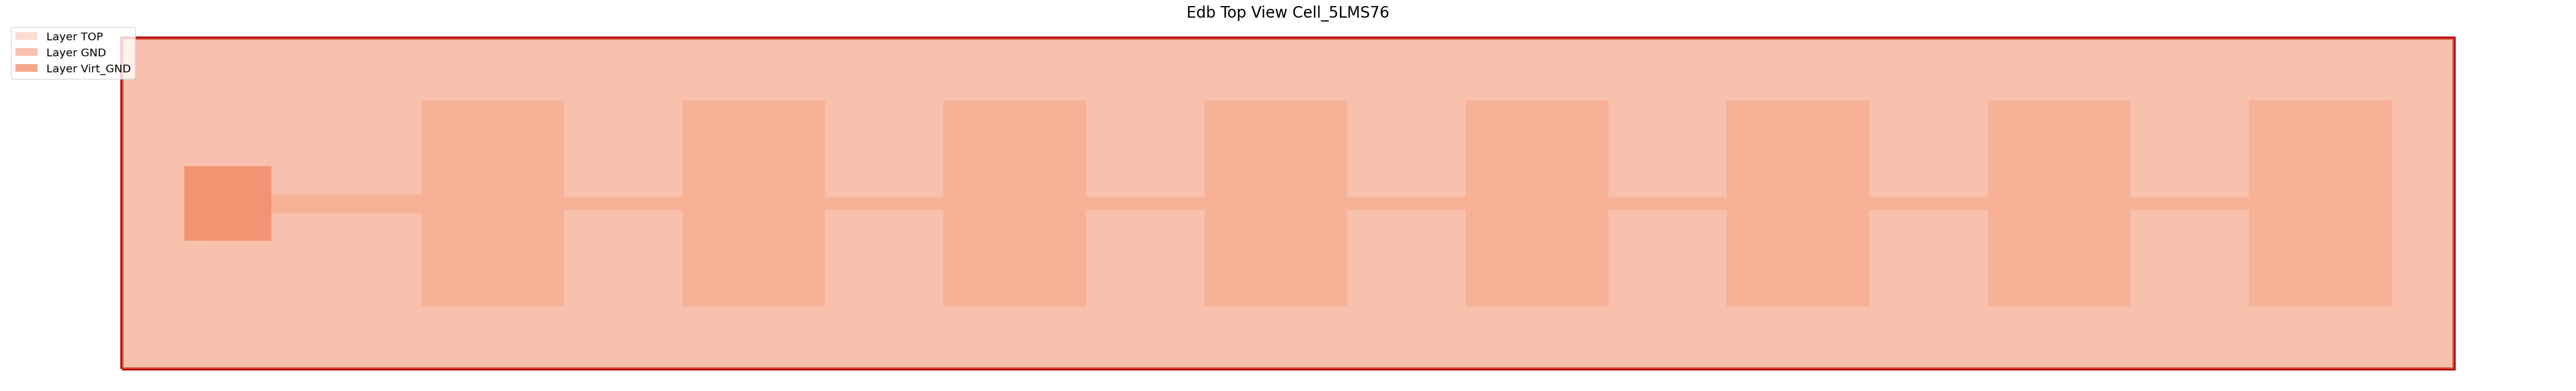

PyEDB INFO: Plot Generation time 0.269


INFO:Edb:Plot Generation time 0.269


(<Figure size 6000x3000 with 1 Axes>,
 <Axes: title={'center': 'Edb Top View Cell_5LMS76'}>)

In [14]:
edb.nets.plot()

The EDB is complete. Now close the EDB and import it into HFSS as a "Layout Component".

In [15]:
edb.save_edb()
edb.close_edb()
print("EDB saved correctly to {}. You can import in AEDT.".format(aedb_path))

PyEDB INFO: Save Edb file completed in 0.0000 seconds.


INFO:Edb:Save Edb file completed in 0.0000 seconds.


PyEDB INFO: Close Edb file completed in 0.0120 seconds.


INFO:Edb:Close Edb file completed in 0.0120 seconds.


EDB saved correctly to C:\Users\ansys\AppData\Local\Temp\tmpb693ue8m.ansys\linear_array.aedb. You can import in AEDT.


## 3D component in HFSS

First create an instance of the ``pyaedt.Hfss`` class. If you set
> ``non_graphical = False

then AEDT user interface will be visible after the following cell is executed.
It is now possible to monitor the progress in the UI as each of the following cells is executed.
All commands can be run without the UI by changing the value of ``non_graphical``.

In [16]:
h3d = ansys.aedt.core.Hfss(
    projectname="Demo_3DComp",
    designname="Linear_Array",
    specified_version="2025.2",
    new_desktop_session=True,
    non_graphical=non_graphical,
    close_on_exit=True,
    solution_type="Terminal",
)

PyAEDT WARNING: Argument `designname` is deprecated for method `__init__`; use `design` instead.


PyAEDT WARNING: Argument `projectname` is deprecated for method `__init__`; use `project` instead.


PyAEDT WARNING: Argument `specified_version` is deprecated for method `__init__`; use `version` instead.


PyAEDT WARNING: Argument `new_desktop_session` is deprecated for method `__init__`; use `new_desktop` instead.


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


INFO:Global:Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.22.dev0.


INFO:Global:PyAEDT version 0.22.dev0.


PyAEDT INFO: Initializing new Desktop session.


INFO:Global:Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


INFO:Global:Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_85c3c953-5422-4402-a5aa-3d8b35433a81.log is enabled.


INFO:Global:Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_85c3c953-5422-4402-a5aa-3d8b35433a81.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


INFO:Global:Log on AEDT is disabled.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


INFO:Global:Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT with gRPC plugin.


INFO:Global:Launching PyAEDT with gRPC plugin.


PyAEDT INFO: New AEDT session is starting on gRPC port 51387.


INFO:Global:New AEDT session is starting on gRPC port 51387.


PyAEDT INFO: Electronics Desktop started on gRPC port: 51387 after 10.924410581588745 seconds.


INFO:Global:Electronics Desktop started on gRPC port: 51387 after 10.924410581588745 seconds.


PyAEDT INFO: AEDT installation Path C:\Program Files\ANSYS Inc\v252\AnsysEM


INFO:Global:AEDT installation Path C:\Program Files\ANSYS Inc\v252\AnsysEM


PyAEDT INFO: Ansoft.ElectronicsDesktop.2025.2 version started with process ID 9128.


INFO:Global:Ansoft.ElectronicsDesktop.2025.2 version started with process ID 9128.


PyAEDT INFO: Project Demo_3DComp has been created.


INFO:Global:Project Demo_3DComp has been created.


PyAEDT INFO: Added design 'Linear_Array' of type HFSS.


INFO:Global:Added design 'Linear_Array' of type HFSS.


PyAEDT INFO: Aedt Objects correctly read


INFO:Global:Aedt Objects correctly read


Set units to ``mm``.

In [17]:
h3d.modeler.model_units = "mm"

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


INFO:Global:Modeler class has been initialized! Elapsed time: 0m 0sec


## Import the EDB as a 3D component

One or more layout components can be imported into HFSS.
The combination of layout data and 3D CAD data helps streamline model creation and setup.

In [18]:
component = h3d.modeler.insert_layout_component(aedb_path, parameter_mapping=True)

PyEDB INFO: Star initializing Edb 04:43:26.894019


C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\misc\decorators.py:55: UserWarning: Argument `edbversion` is deprecated for method `Edb`; use `version` instead.
  warnings.warn(
C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\generic\design_types.py:301: UserWarning: Your ANSYS AEDT version is eligible to gRPC version.You might consider switching to that version for better user experience.For more information please check this link: https://edb.docs.pyansys.com/version/dev/grpc_api/index.html
  warnings.warn(GRPC_GENERAL_WARNING, UserWarning)
INFO:Edb:Star initializing Edb 04:43:26.894019


PyEDB INFO: Edb version 2025.2


INFO:Edb:Edb version 2025.2


PyEDB INFO: Logger is initialized. Log file is saved to C:\Users\ansys\AppData\Local\Temp\pyedb_ansys.log.


INFO:Edb:Logger is initialized. Log file is saved to C:\Users\ansys\AppData\Local\Temp\pyedb_ansys.log.


PyEDB INFO: legacy v0.61.0


INFO:Edb:legacy v0.61.0


PyEDB INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


INFO:Edb:Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyEDB INFO: Database linear_array.aedb Opened in 2025.2


INFO:Edb:Database linear_array.aedb Opened in 2025.2


PyEDB INFO: Cell Cell_5LMS76 Opened


INFO:Edb:Cell Cell_5LMS76 Opened


PyEDB INFO: Builder was initialized.


INFO:Edb:Builder was initialized.


PyEDB INFO: open_edb completed in 0.0222 seconds.


INFO:Edb:open_edb completed in 0.0222 seconds.


PyEDB INFO: EDB initialization completed in 0.0348 seconds.


INFO:Edb:EDB initialization completed in 0.0348 seconds.


PyEDB INFO: Close Edb file completed in 0.0000 seconds.


INFO:Edb:Close Edb file completed in 0.0000 seconds.


PyAEDT INFO: Parsing C:\Users\ansys\Documents\Ansoft\Demo_3DComp.aedt.


INFO:Global:Parsing C:\Users\ansys\Documents\Ansoft\Demo_3DComp.aedt.


PyAEDT INFO: File C:\Users\ansys\Documents\Ansoft\Demo_3DComp.aedt correctly loaded. Elapsed time: 0m 0sec


INFO:Global:File C:\Users\ansys\Documents\Ansoft\Demo_3DComp.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.015720844268798828


INFO:Global:aedt file load time 0.015720844268798828


PyEDB INFO: Star initializing Edb 04:43:28.435998


INFO:Edb:Star initializing Edb 04:43:28.435998


PyEDB INFO: Edb version 2025.2


INFO:Edb:Edb version 2025.2


PyEDB INFO: Logger is initialized. Log file is saved to C:\Users\ansys\AppData\Local\Temp\pyedb_ansys.log.


INFO:Edb:Logger is initialized. Log file is saved to C:\Users\ansys\AppData\Local\Temp\pyedb_ansys.log.


PyEDB INFO: legacy v0.61.0


INFO:Edb:legacy v0.61.0


PyEDB INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


INFO:Edb:Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyEDB WARNING: AEDT project-related file C:\Users\ansys\Documents\Ansoft\Demo_3DComp.aedb\LayoutComponents\linear_array0\linear_array0.aedt.lock exists and may need to be deleted before opening the EDB in HFSS 3D Layout.


PyEDB INFO: Database linear_array0.aedb Opened in 2025.2


INFO:Edb:Database linear_array0.aedb Opened in 2025.2


PyEDB INFO: Cell Cell_5LMS76 Opened


INFO:Edb:Cell Cell_5LMS76 Opened


PyEDB INFO: Builder was initialized.


INFO:Edb:Builder was initialized.


PyEDB INFO: open_edb completed in 0.0159 seconds.


INFO:Edb:open_edb completed in 0.0159 seconds.


PyEDB INFO: EDB initialization completed in 0.0264 seconds.


INFO:Edb:EDB initialization completed in 0.0264 seconds.


## Expose the component parameters

If a layout component is parametric, you can expose and change parameters in HFSS

In [19]:
component.parameters

w1_name = "{}_{}".format("w1", h3d.modeler.user_defined_component_names[0])
h3d[w1_name] = 0.0015

### Radiation Boundary Assignment

The 3D domain includes the air volume surrounding the antenna.
This antenna will be simulted from 20 GHz - 50 GHz.

A "radiation boundary" will be assigned to the outer boundaries of the domain.
This boundary should be roughly one quarter wavelength away from the radiating structure:

$$ \lambda/4 = \frac{c_0}{4 f} \approx 2.8mm $$

In [20]:
h3d.modeler.fit_all()

h3d.modeler.create_air_region(2.8, 2.8, 2.8, 2.8, 2.8, 2.8, is_percentage=False)
h3d.assign_radiation_boundary_to_objects("Region")

PyAEDT INFO: Boundary Radiation Rad__W05EF6 has been created.


INFO:Global:Boundary Radiation Rad__W05EF6 has been created.


### Set up analysis

The finite element mesh is adapted iteratively.
The maximum number of adaptive passes is set using the ``MaximumPasses`` property.
This model converges such that the $S_{11}$ is independent of the mesh.
The default accuracy setting is:
$$ \max(|\Delta S|) < 0.02 $$

In [21]:
setup = h3d.create_setup()
setup.props["Frequency"] = "20GHz"
setup.props["MaximumPasses"] = 10

Specify properties of the frequency sweep:

In [22]:
sweep1 = setup.add_sweep(sweepname="20GHz_to_50GHz")
sweep1.props["RangeStart"] = "20GHz"
sweep1.props["RangeEnd"] = "50GHz"
sweep1.update()

PyAEDT WARNING: Argument `sweepname` is deprecated for method `add_sweep`; use `name` instead.


True

Solve the project

In [23]:
h3d.analyze()

PyAEDT INFO: Project Demo_3DComp Saved correctly


INFO:Global:Project Demo_3DComp Saved correctly


PyAEDT INFO: Solving all design setups. Analysis started...


INFO:Global:Solving all design setups. Analysis started...


PyAEDT INFO: Design setup None solved correctly in 0.0h 3.0m 6.0s


INFO:Global:Design setup None solved correctly in 0.0h 3.0m 6.0s


True

## Plot results outside AEDT

Plot results using Matplotlib.

PyAEDT INFO: Parsing C:\Users\ansys\Documents\Ansoft\Demo_3DComp.aedt.


INFO:Global:Parsing C:\Users\ansys\Documents\Ansoft\Demo_3DComp.aedt.


PyAEDT INFO: File C:\Users\ansys\Documents\Ansoft\Demo_3DComp.aedt correctly loaded. Elapsed time: 0m 0sec


INFO:Global:File C:\Users\ansys\Documents\Ansoft\Demo_3DComp.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.03192400932312012


INFO:Global:aedt file load time 0.03192400932312012


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


INFO:Global:PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


INFO:Global:Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Solution Data Correctly Loaded.


INFO:Global:Solution Data Correctly Loaded.


Time to initialize solution data:0.015465259552001953
Time to initialize solution data:0.02697157859802246


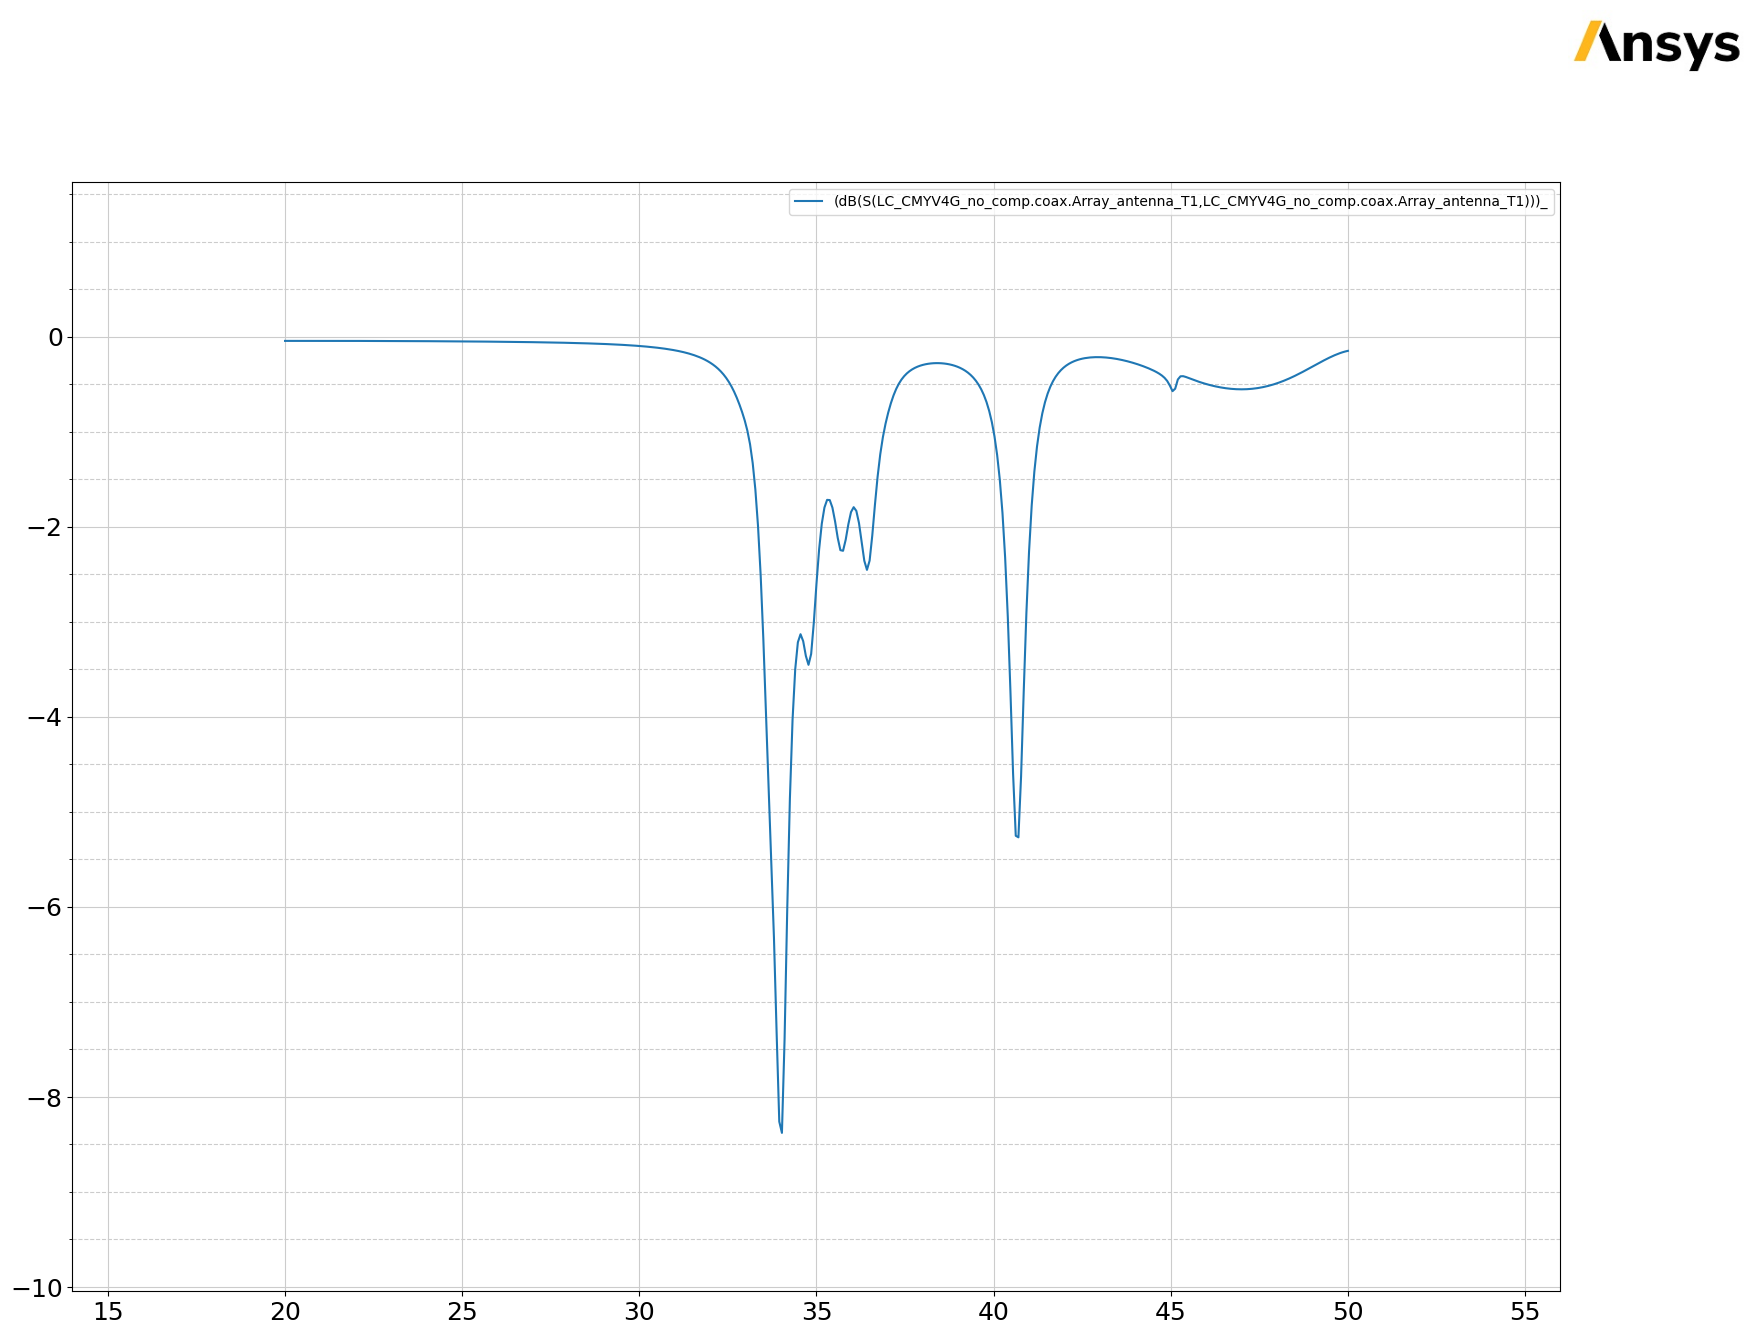

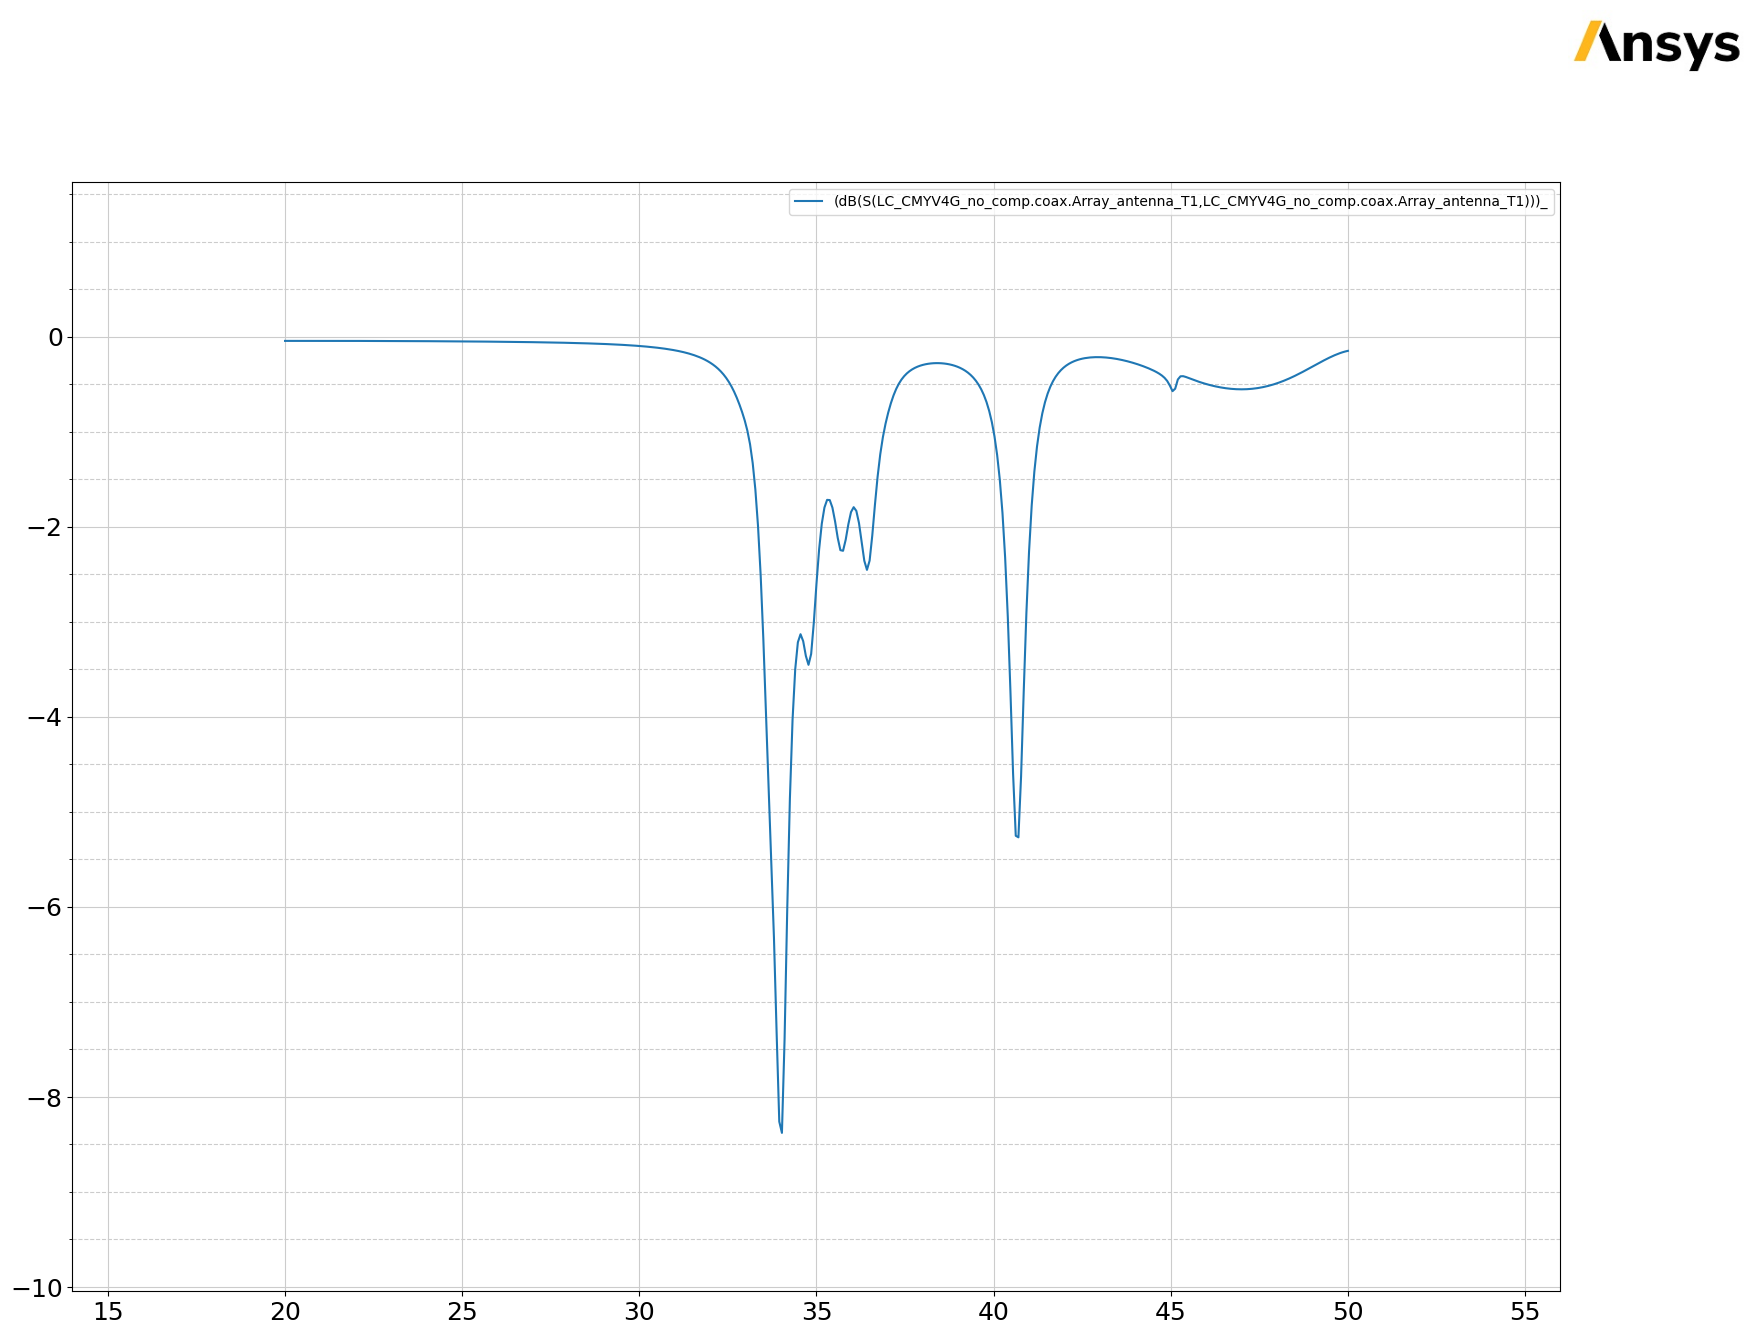

In [24]:
trace = h3d.get_traces_for_plot()
solution = h3d.post.get_solution_data(trace[0])
solution.plot()

## Plot far fields in AEDT

Plot radiation patterns in AEDT.

In [25]:
variations = {}
variations["Freq"] = ["20GHz"]
variations["Theta"] = ["All"]
variations["Phi"] = ["All"]
h3d.insert_infinite_sphere(name="3D")

new_report = h3d.post.reports_by_category.far_field("db(RealizedGainTotal)", h3d.nominal_adaptive, "3D")
new_report.variations = variations
new_report.primary_sweep = "Theta"
new_report.create("Realized2D")

True

## Plot far fields in AEDT

Plot radiation patterns in AEDT

In [26]:
new_report.report_type = "3D Polar Plot"
new_report.secondary_sweep = "Phi"
new_report.create("Realized3D")

True

## Plot far fields outside AEDT

Plot radiation patterns outside AEDT

PyAEDT INFO: Solution Data Correctly Loaded.


INFO:Global:Solution Data Correctly Loaded.


Time to initialize solution data:0.012707710266113281
Time to initialize solution data:0.015731096267700195


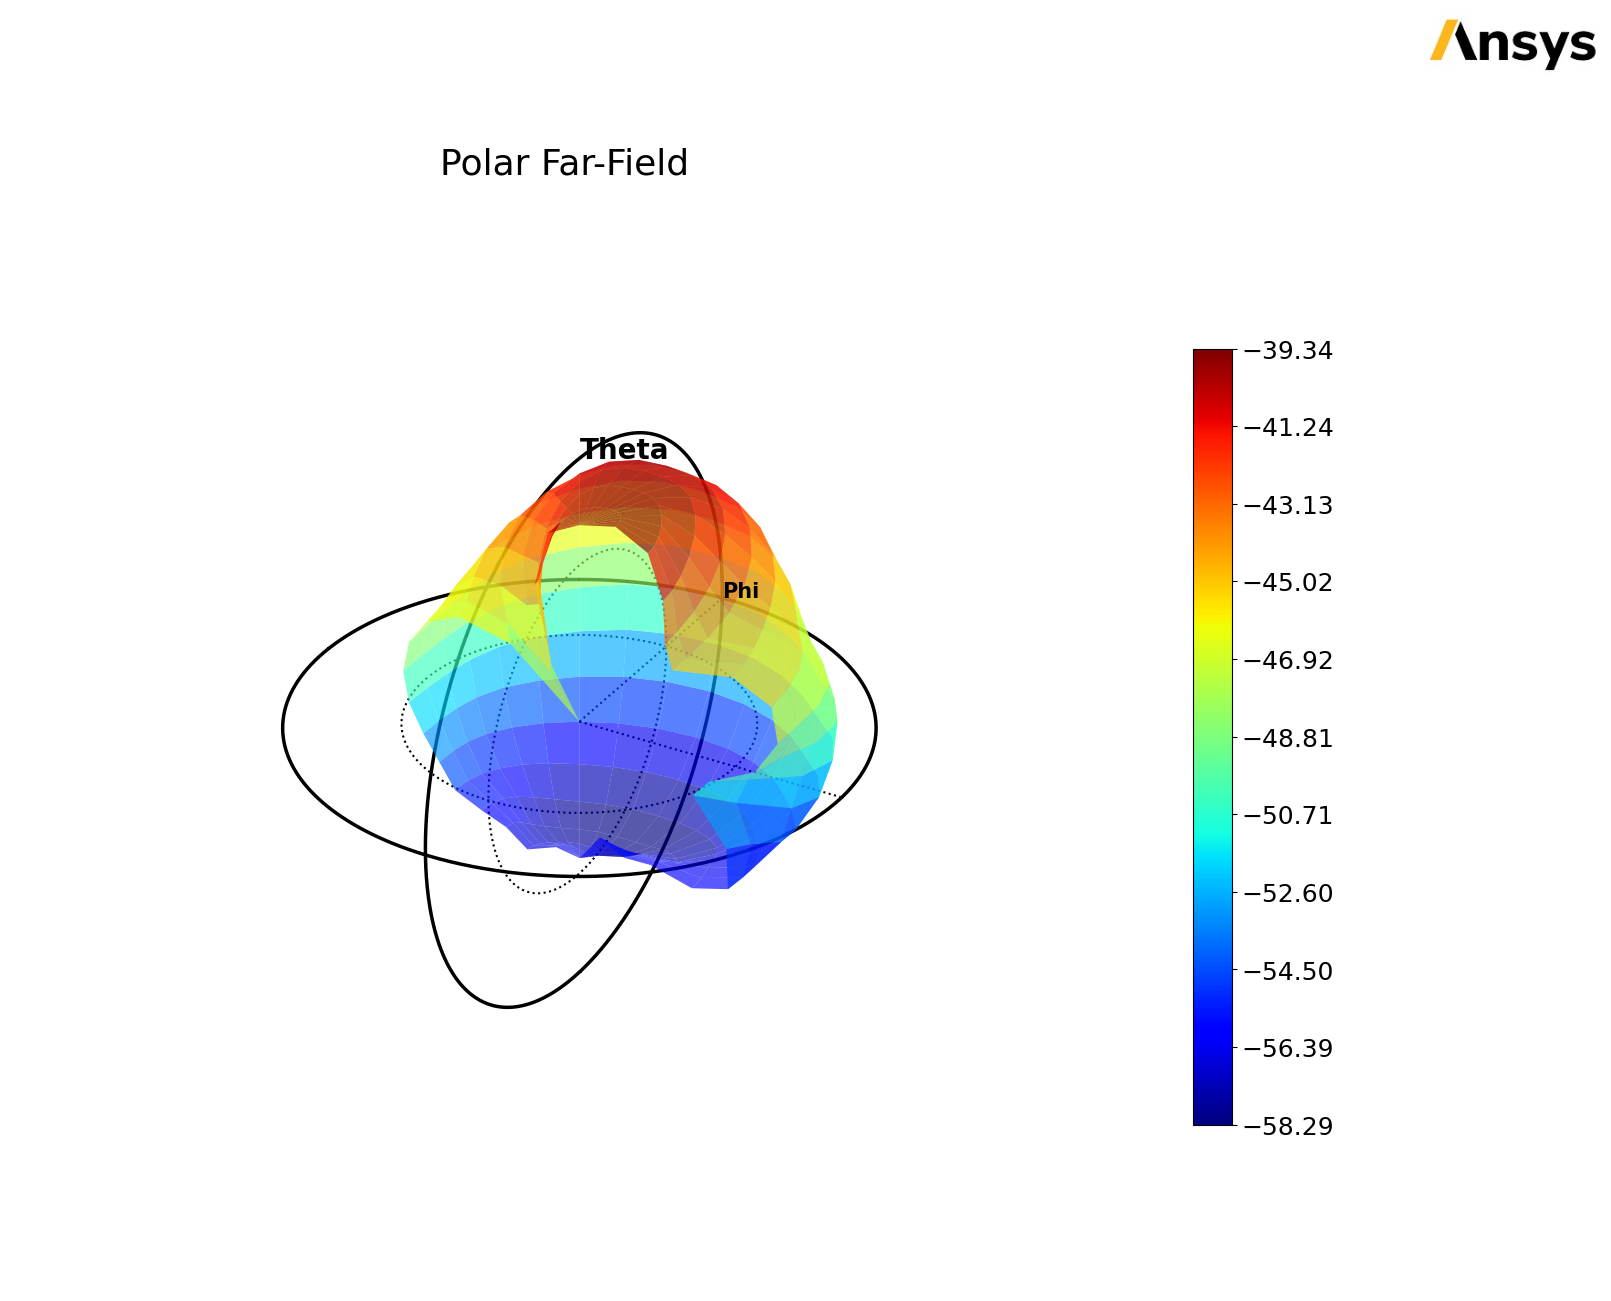

In [27]:
solutions_custom = new_report.get_solution_data()
solutions_custom.plot_3d()

## Plot E Field on nets and layers

Plot E Field on nets and layers in AEDT

In [28]:
h3d.post.create_fieldplot_layers_nets(
    [["TOP", "Array_antenna"]],
    "Mag_E",
    intrinsics={"Freq": "20GHz", "Phase": "0deg"},
    plot_name="E_Layers",
)

PyAEDT INFO: Active Design set to Linear_Array


INFO:Global:Active Design set to Linear_Array


## Close AEDT

After the simulation completes, the application can be released from the
:func:`ansys.aedt.core.Desktop.release_desktop` method.
All methods provide for saving the project before closing AEDT.

In [29]:
h3d.save_project(os.path.join(temp_dir.name, "test_layout.aedt"))
h3d.release_desktop()

PyAEDT INFO: Project test_layout Saved correctly


INFO:Global:Project test_layout Saved correctly


PyEDB INFO: Close Edb file completed in 0.0000 seconds.


INFO:Edb:Close Edb file completed in 0.0000 seconds.


PyAEDT INFO: Desktop has been released and closed.


INFO:Global:Desktop has been released and closed.


True

### Clean up the temporary directory

The following command removes the project and the temporary directory.
If you'd like to save this project, save it to a folder of your choice prior
to running the following cell.

In [30]:
temp_dir.cleanup()